In [1]:
import seaborn as sns
import pandas as pd

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape #데이터 구조 - 관측치행 수, 변수열 수

(150, 5)

In [5]:
iris.info() #데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe() #양적 자료 - 요약통계량 산출 - 개수, 평균, 표준편차, 최소값, 사분위수(1/2/3), 최대값

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.describe(include = 'all') #전체 변수열 적용

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
#특징 행렬 추출
features = iris.iloc[:, 0:4]
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#KMeans 함수 import
from sklearn.cluster import KMeans

In [10]:
#K = 3 가정, k 평균 군집화
km = KMeans(n_clusters = 3,
            init = "random",
            max_iter = 300)   #모형 인스턴스(km) 생성

In [11]:
#데이터 적합 -> 결과 획득
km.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [12]:
print(km.labels_)  #할당된 군집번호

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [13]:
print(km.inertia_) # WSS값

78.851441426146


In [14]:
#스크리 도표 계산과정
wss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k,
                  init = "random",
                  max_iter = 300)  #keans 모형 인스턴스 생성

  kmeans.fit(features) #데이터 적합 -> 결과가 kmeans 객체 포함
  wss.append(kmeans.inertia_) #군집 내 제곱합 계산 결과 추가

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
print(wss)

[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.47223015873017, 39.03998724608726, 34.5730308278678, 32.53341456693575, 28.456018971224864, 27.12872295163445]


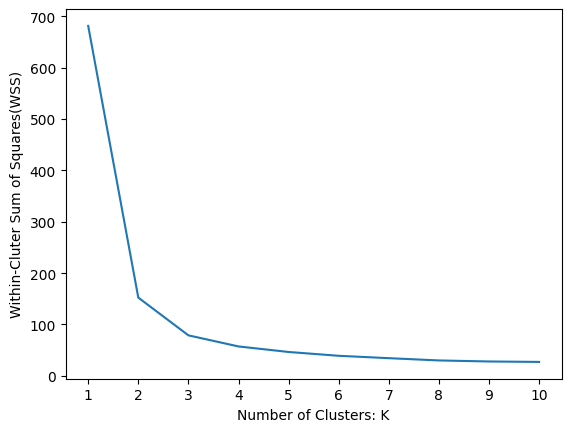

In [ ]:
#스크리 도표(scree plot) 시각화
import matplotlib.pyplot as plt
plt.plot(range(1,11), wss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters: K")
plt.ylabel("Within-Cluter Sum of Squares(WSS)")
plt.show()

In [ ]:
#K = 3 가정, k 평균 군집화
km = KMeans(n_clusters = 3,
            init = "random",
            max_iter = 300)   #모형 인스턴스(km) 생성


In [ ]:
#데이터 적합 -> 결과 획득
km.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [ ]:
print(km.labels_) #할당된 군집번호

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


In [ ]:
print(km.inertia_) #군집 내 제곱합(Within-Cluster Sum of Squares; WSS)

78.851441426146


In [16]:
result = features
result['Cl'] = km.labels_
result.head()

,sepal_length,sepal_width,petal_length,petal_width,Cl
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
#군집별 꽃받침 길이의 분포 비교
result.groupby('Cl')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Cl,,,,,,,,
0,62.0,5.901613,0.466410,4.9,5.600,5.9,6.2,7.0
1,50.0,5.006000,0.352490,4.3,4.800,5.0,5.2,5.8
2,38.0,6.850000,0.494155,6.1,6.425,6.7,7.2,7.9


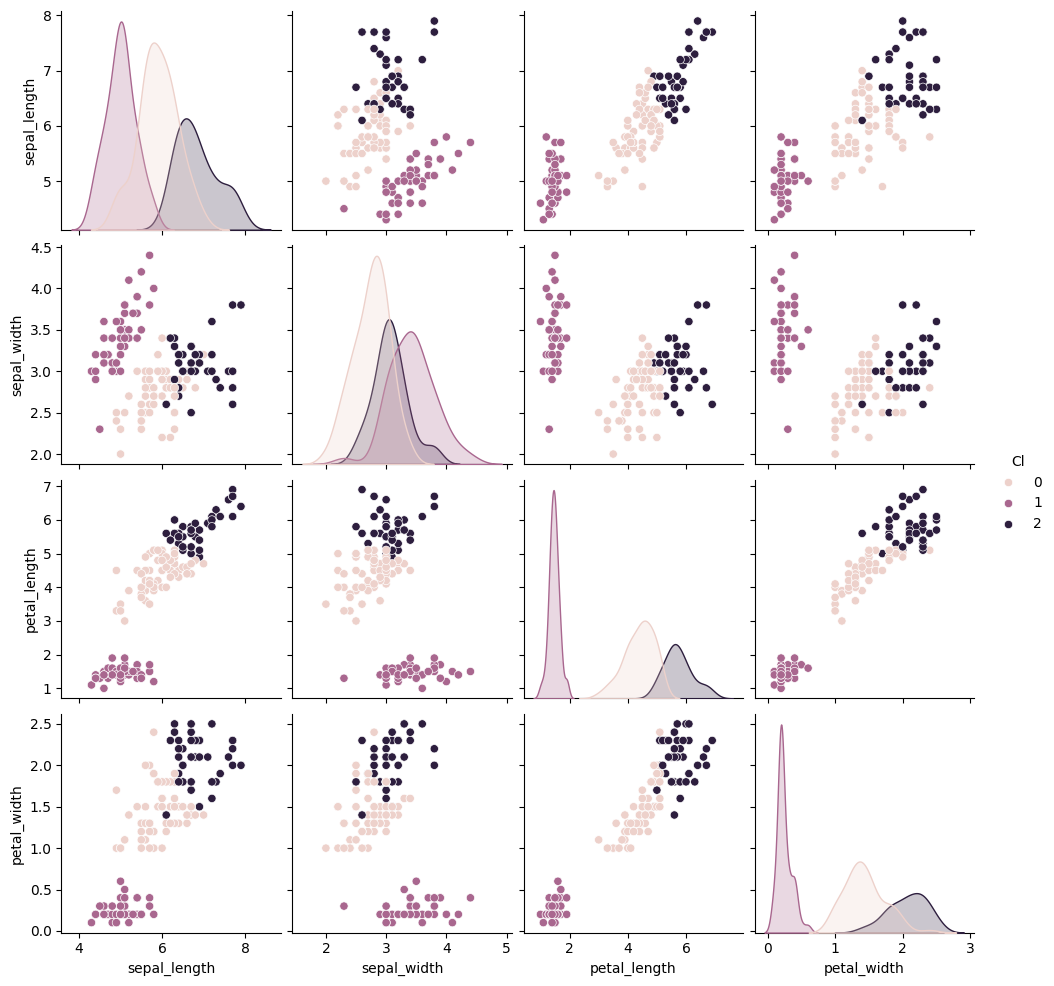

In [19]:
sns.pairplot(result, hue='Cl')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#원본 데이터에서 꽃잎(petal)의 두 변수를 추출
petal = iris.iloc[:,[2,3]]
#iris[['petal_length', 'petal_width']]

In [ ]:
import numpy as np
x, y = petal['petal_length'], petal['petal_width']
x, y = np.array(x), np.array(y)
x, y = x.reshape(-1,1), y.reshape(-1,1)

In [ ]:
model_petal2 = LinearRegression()
model_petal2.fit(x, y)

LinearRegression()

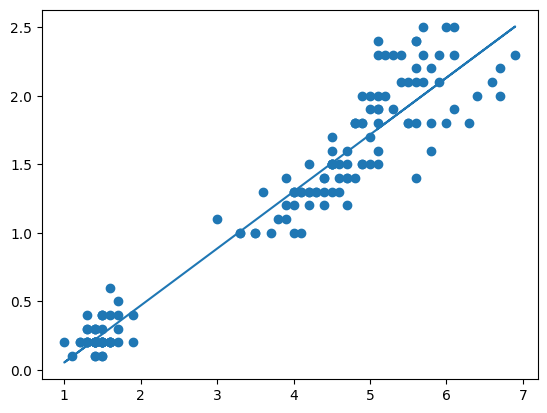

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model_petal2.predict(x))